In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Fibonacci_number = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657]

In [8]:
def CutAndProject(n, phi):
    phi = phi + 0.00001
    tau = Fibonacci_number[n]/Fibonacci_number[n-1]
    
    den = Fibonacci_number[n]
    xlim = 13
    ylim = 1.5
    sintheta = (1/tau)/(np.sqrt(1+(1/tau)**2))
    costheta = 1/(np.sqrt(1+(1/tau)**2))
    R = np.array([[costheta, -sintheta],[sintheta, costheta]])
    a_surf = 1/2*(costheta+sintheta)
    N = 20
    xx = np.linspace(0,N)

    superlat_bare = np.array([[x,y] for x in range(-N,N) for y in range(-N,N)])
    superlat = [np.dot(R,point) for point in superlat_bare]
    offset = (np.mod(phi+np.pi,2*np.pi) - np.pi)/np.pi*a_surf

    fig1, axes = plt.subplots(2, figsize = (10,4.5))
    ax, ax2 = axes
    ax.set_aspect('equal')
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()

    ax.plot(xx,[offset for x in xx], 'black')

    ax.set_xlim([-0.3,xlim])
    ax.set_ylim([-ylim,ylim])

    for x in range(-N,N):
        point1 = R.dot(np.array([x,-N]))
        point2 = R.dot(np.array([x,N]))
        ax.plot([point1[0], point2[0]],[point1[1], point2[1]], "gray")

    for y in range(-N,N):
        point1 = R.dot(np.array([-N,y]))
        point2 = R.dot(np.array([N,y]))
        ax.plot([point1[0], point2[0]],[point1[1], point2[1]], "gray")

    ax.plot([0,0],[-a_surf, a_surf], "r")

    ax.axhspan(ymin = -a_surf + offset, ymax = a_surf + offset, alpha = 0.2)

    FCpoints = []
    for point in superlat:
        if (point[1]-offset)<a_surf and (point[1]-offset)>=-a_surf:
            FCpoints = np.append(FCpoints, point[0])
            ax.plot([point[0],point[0]],[point[1],offset], "C0")
    ax.scatter(FCpoints,[offset for point in FCpoints], s=50, edgecolors = 'black', c = 'white')

    for x in range(den,xlim+1,den):
        ax.axvline(x/costheta, color = "k")
    ax.plot([0,0],[a_surf, 2], "k")
    ax.plot([0,0],[-2,-a_surf],"k")
    
    FCpoints = np.sort(FCpoints)
    firstPoint = np.argwhere(abs(FCpoints)<=10**(-5))[0,0]
    points = FCpoints[firstPoint:firstPoint+21]

    ax2.plot(points, np.zeros(len(points)), "o")
    bonds = np.diff(points)
    for pos,bond in zip(points[:-1],bonds):
        if abs(bond-max(bonds))<10**-6:
            ax2.plot([pos, pos + bond],[0,0], "k")
            ax2.annotate("A", xy = [pos+bond/2,0.2])
        else:
            ax2.plot([pos, pos + bond],[0.08,0.08], "k")
            ax2.plot([pos, pos + bond],[-0.08,-0.08], "k")
            ax2.annotate("B", xy = [pos+bond/2,0.2])

    ax2.set_ylim([-0.5,0.5])
    ax2.set_xlim([-0.3,13])
    ax2.set_yticks([])
    ax2.set_xticks([])
    ax2.set_aspect('equal')

    for x in range(0,N,den):
        ax2.axvline(x/costheta, color = "k")

    plt.tight_layout()

In [9]:
interact(CutAndProject, n=widgets.IntSlider(min=1, max=6, step=1, value=2),phi = (-np.pi,np.pi))

interactive(children=(IntSlider(value=2, description='n', max=6, min=1), FloatSlider(value=0.0, description='p…

<function __main__.CutAndProject(n, phi)>

## Graphics maker

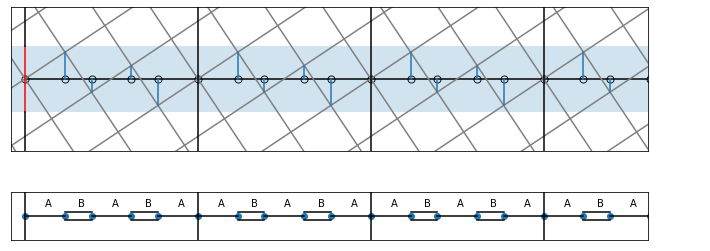

In [10]:
n = 2
phi = 0
CutAndProject(n, phi)
plt.savefig("GraphicsJobTalk/IntroToFC.svg")

## Rotated grid

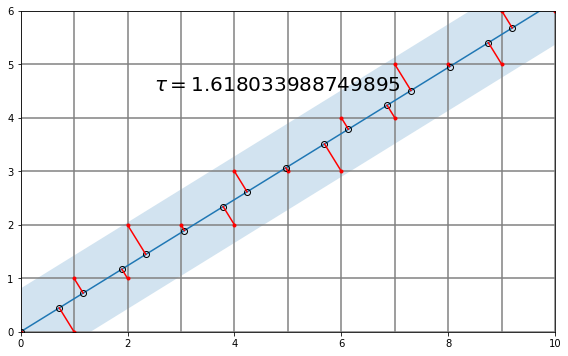

In [7]:
N = 10
tau = 1/2 + np.sqrt(5)/2
phi = 0
shift = phi/(2*np.pi)
sintheta = (1/tau)/(np.sqrt(1+(1/tau)**2))
costheta = 1/(np.sqrt(1+(1/tau)**2))
tantheta = 1/tau

fig, ax = plt.subplots(figsize = (8,5))
ax.set_aspect(1)
    
xx = np.arange(N+1)
yy = np.arange(tantheta*N//1+1)
x_grid, y_grid = np.meshgrid(xx,yy)

ax.set_xlim([0,N])
ax.set_ylim([0,max(yy)])

for x in xx:
    ax.axvline(x, color = "grey")
    
for y in yy:
    ax.axhline(y, color = "grey")


y_slice = tantheta*xx + shift
ax.plot(xx, y_slice)

y_int = 1/2*(1 + tantheta)
y_int = 1/2*(1 + tantheta)

# x_intercept = 1/2*(1/sintheta + 1/costheta)
points = [[0,0 + shift],[0,y_int + shift],[N,tantheta*N + shift + y_int],[N,tantheta*N-y_int + shift],[0,-y_int + shift]]
bounds = mpl.patches.Polygon(points,closed = True, alpha = 0.2)
ax.add_patch(bounds)

positions = []

for x in xx:
    for y in yy:
        if y-shift-tantheta*x-y_int<-10**(-10) and y-shift - tantheta*x+y_int>-10**(-10):
            ax.plot(x,y,"r.")
            
            x1 = x+costheta*sintheta*(y-tantheta*x-shift)
            y1 = tantheta*x+sintheta**2*(y-shift-tantheta*x) + shift
            
            ax.plot(x1,y1,"ko", fillstyle = "none")
            ax.plot([x,x1], [y,y1], "r")

            
#             ax.plot(x + x_disp ,tantheta*(x+x_disp), "ko", fillstyle = 'none')
#             ax.plot([x,x+x_disp], [y, tantheta*(x+x_disp)], "r")
            
            positions.append(np.dot(np.array([sintheta, costheta]), np.array([x1,y1])))

ax.annotate("$\\tau = {{{:}}}$".format(tau), xycoords = "axes fraction", xy = (1/4,3/4), fontsize = 20)
plt.tight_layout()



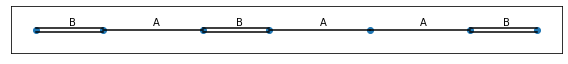

In [8]:
fig, ax2 = plt.subplots(figsize = (8,1))

positions = np.array([point for point in FCpoints if point>0 and point<5])

ax2.plot(positions, np.zeros(len(positions)), "o")
bonds = np.diff(positions)
for pos,bond in zip(positions[:-1],bonds):
    if abs(bond-max(bonds))<10**-6:
        ax2.plot([pos, pos + bond],[0,0], "k")
        ax2.annotate("A", xy = [pos+bond/2,0.2])
    else:
        ax2.plot([pos, pos + bond],[0.1,0.1], "k")
        ax2.plot([pos, pos + bond],[-0.1,-0.1], "k")
        ax2.annotate("B", xy = [pos+bond/2,0.2])


        
ax2.set_ylim([-1,1])
ax2.set_yticks([])
ax2.set_xticks([])
        

plt.tight_layout()